In [1]:
# version 2: Code injects point sources randomly and with uniform intensity

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm, uniform
from scipy.integrate import quad

import sys, os, time, fileinput

import matplotlib.pyplot as plt
import matplotlib as mpl

plt.style.use('default') 

In [3]:
phi_events, theta_events = np.load('sample_skymap_upper_angular.npy', allow_pickle=True)

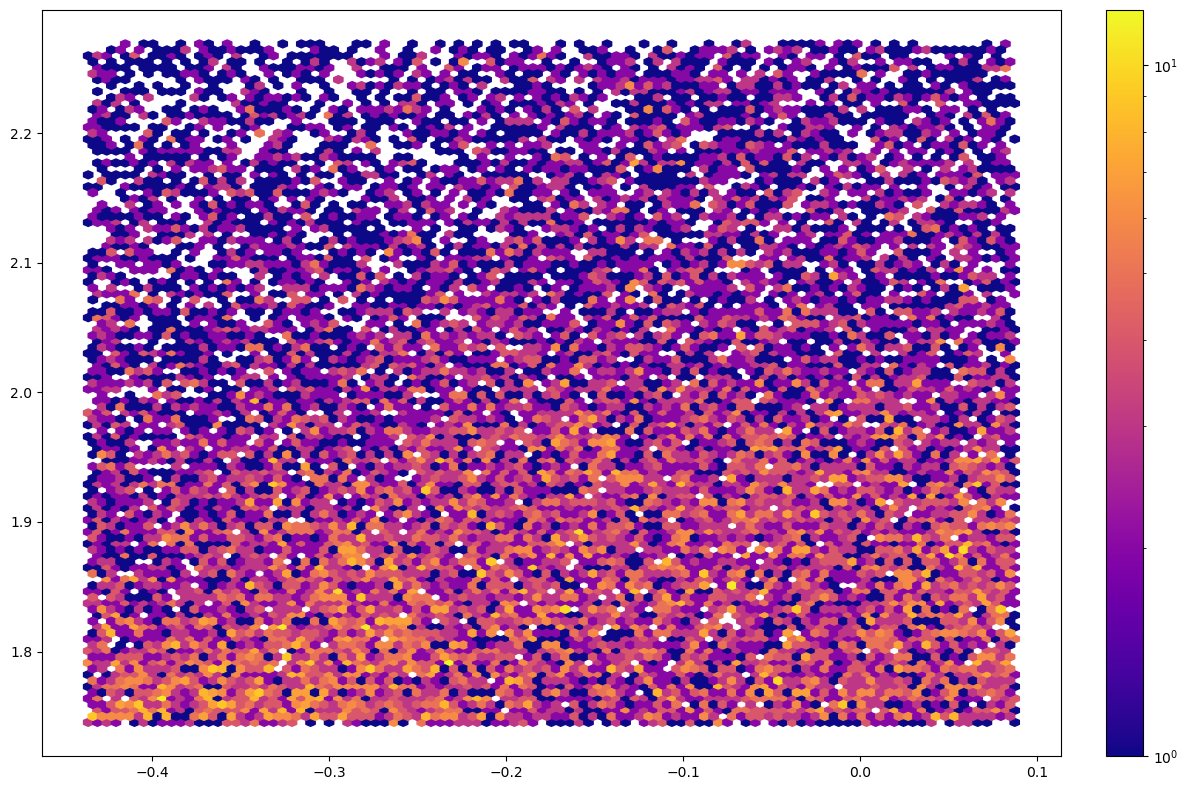

In [4]:
fig = plt.figure(1,figsize=(12,8))
ax = fig.add_subplot(111)

s = ax.hexbin(phi_events,theta_events,gridsize=100,cmap='plasma',mincnt=1,bins='log')

plt.colorbar(s,fraction=0.046, pad=0.04)

plt.tight_layout()

In [5]:
# center offset data to [-15,15] x [-15,15]

phi_centered = phi_events + 10 * np.pi / 180
theta_centered = theta_events - 25 * np.pi / 180

x_data = ( phi_centered * 180 / np.pi / 15 + 1 ) / 2
y_data = ( (theta_centered - np.pi/2) * 180 / np.pi / 15 + 1 ) / 2
data = np.vstack((x_data, y_data)).T

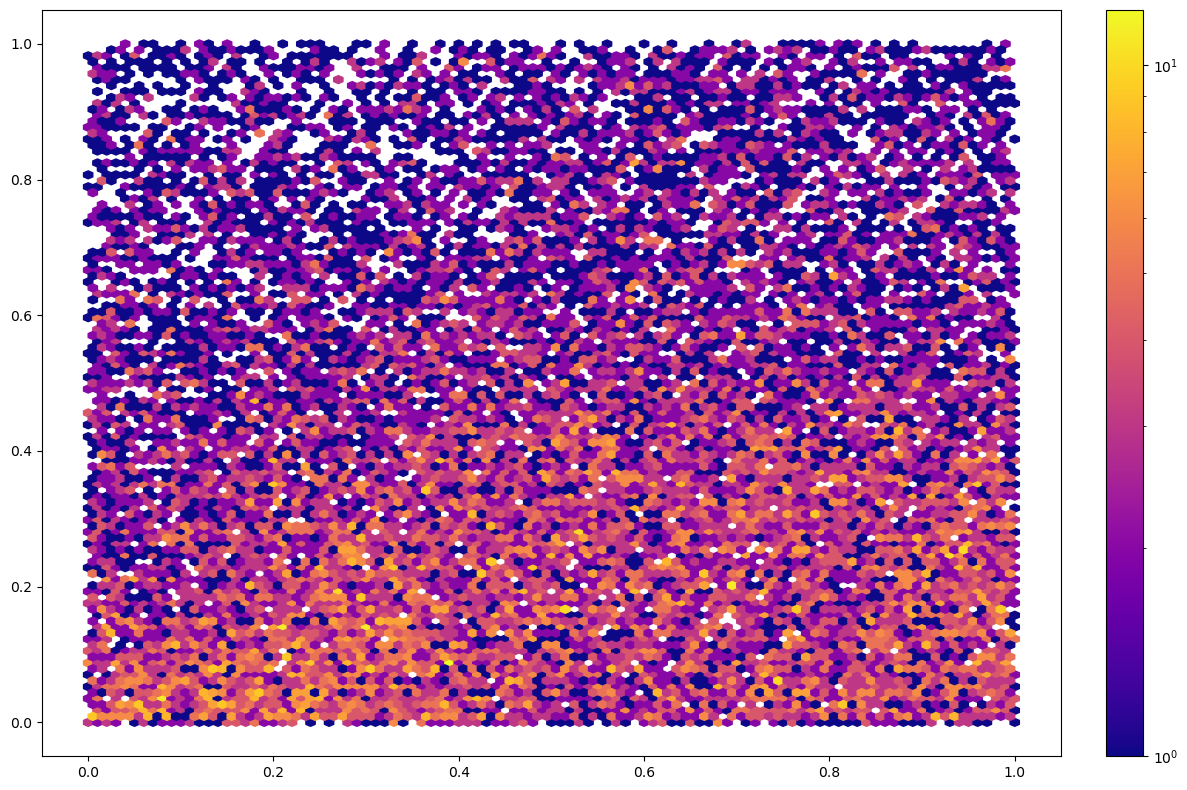

In [6]:
fig = plt.figure(1,figsize=(12,8))
ax = fig.add_subplot(111)

s = ax.hexbin(x_data,y_data,gridsize=100,cmap='plasma',mincnt=1,bins='log')

plt.colorbar(s,fraction=0.046, pad=0.04)

plt.tight_layout()

In [7]:
psf_degree = 0.4
psf_scale = psf_degree / 15  / 2

(0.0, 1.0)

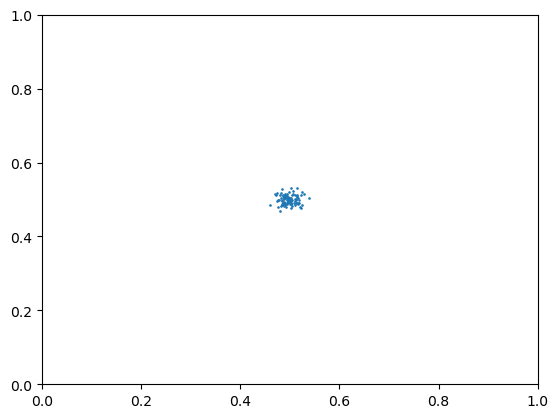

In [8]:
nm = norm(scale = psf_scale, loc = 0.5)
x_ps = nm.rvs(size = 100)
y_ps = nm.rvs(size = 100)

plt.scatter(x_ps, y_ps, s = 0.8)
plt.xlim([0,1])
plt.ylim([0,1])

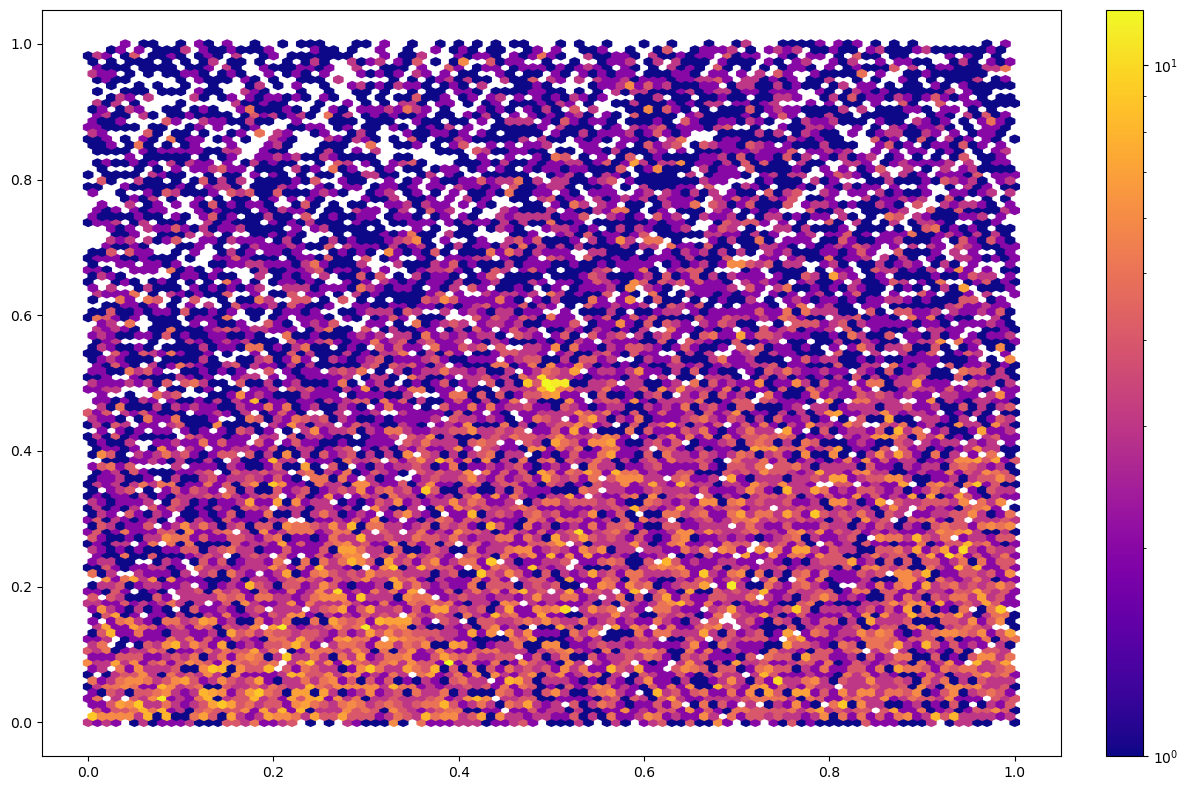

In [9]:
x_data_ps = np.concatenate((x_data, x_ps))
y_data_ps = np.concatenate((y_data, y_ps))

fig = plt.figure(1,figsize=(12,8))
ax = fig.add_subplot(111)

s = ax.hexbin(x_data_ps,y_data_ps,gridsize=100,cmap='plasma',mincnt=1,bins='log')

plt.colorbar(s,fraction=0.046, pad=0.04)

plt.tight_layout()

(0.0, 1.0)

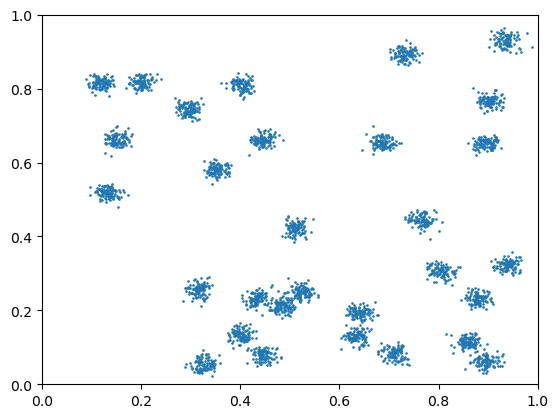

In [37]:
Nps = 30
N_counts = 100

xloc_list = 0.90 * np.random.random(size = Nps) + 0.05
yloc_list = 0.90 * np.random.random(size = Nps) + 0.05
Nx = len(xloc_list)
Ny = len(xloc_list)

x_ps_tot = []
y_ps_tot = []
for nx in range(Nx):
    xloc = xloc_list[nx]
    nm_x = norm(scale = psf_scale, loc = xloc)

    yloc = yloc_list[nx]
    nm_y = norm(scale = psf_scale, loc = yloc)

    x_ps = nm_x.rvs(size = N_counts)
    y_ps = nm_y.rvs(size = N_counts)

    x_ps_tot = np.concatenate((x_ps_tot, x_ps)) 
    y_ps_tot = np.concatenate((y_ps_tot, y_ps)) 
        
x_data_wps = np.concatenate((x_data, x_ps_tot))
y_data_wps = np.concatenate((y_data, y_ps_tot))

plt.scatter(x_ps_tot, y_ps_tot, s = 0.8)
plt.xlim([0,1])
plt.ylim([0,1])

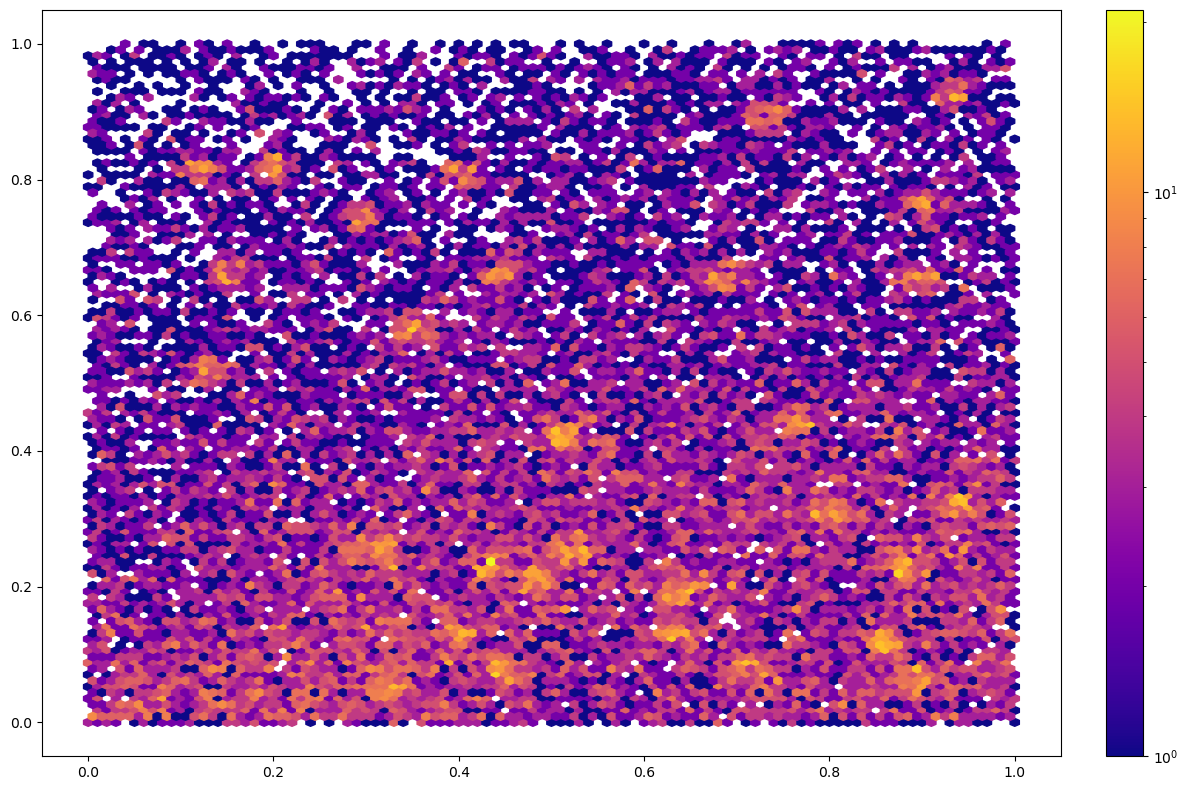

In [40]:
fig = plt.figure(1,figsize=(12,8))
ax = fig.add_subplot(111)

s = ax.hexbin(x_data_wps,y_data_wps,gridsize=100,cmap='plasma',mincnt=1,bins='log')

plt.colorbar(s,fraction=0.046, pad=0.04)

plt.tight_layout()

In [41]:
np.save('sample_skymap_upper_wps_2', [x_data_wps, y_data_wps])
np.save('sample_skymap_upper_wps_2_locs', [xloc_list, yloc_list])

In [42]:
print(len(x_data))
print(len(x_data_wps))

25658
28658


In [1]:
print(25658 / 26283)
print(0.71214221 / 0.7130111)

0.9762203705817448
0.9987813794203204


In [ ]:
# sample data from normal distribution 
N_data = 30

Ng = 10
# N_scales = uniform.rvs(size = Ng)
log_scales = -3 * uniform.rvs(size = Ng) - 1
scales = 10**log_scales
#scales = 0.05 * uniform.rvs(size = Ng)
N_scales = np.array([int(scale**0.5 * N_data) for scale in scales])
locs_x = 0.8 * uniform.rvs(size = Ng) + 0.1
locs_y = 0.8 * uniform.rvs(size = Ng) + 0.1

x_gauss = []
y_gauss = []
for n in range(Ng):
    nm_small_x = norm(scale = scales[n], loc = locs_x[n])
    nm_small_y = norm(scale = scales[n], loc = locs_y[n])
    x_data_small = nm_small_x.rvs(size = int(N_scales[n] * N_data))
    y_data_small = nm_small_y.rvs(size = int(N_scales[n] * N_data))
    x_gauss = np.concatenate((x_gauss, x_data_small))
    y_gauss = np.concatenate((y_gauss, y_data_small))

plt.scatter(x_gauss, y_gauss, s = 0.8)
plt.xlim([0,1])
plt.ylim([0,1])

In [43]:
A = 3 * np.ones([3,3,3])
B = 2 * np.ones([3,3,1])

In [44]:
A *= A

In [45]:
print(A)

[[[9. 9. 9.]
  [9. 9. 9.]
  [9. 9. 9.]]

 [[9. 9. 9.]
  [9. 9. 9.]
  [9. 9. 9.]]

 [[9. 9. 9.]
  [9. 9. 9.]
  [9. 9. 9.]]]


In [4]:
x_data_l, y_data_l = np.load('sample_skymap_upper_wps_2.npy', 
                             allow_pickle = True)

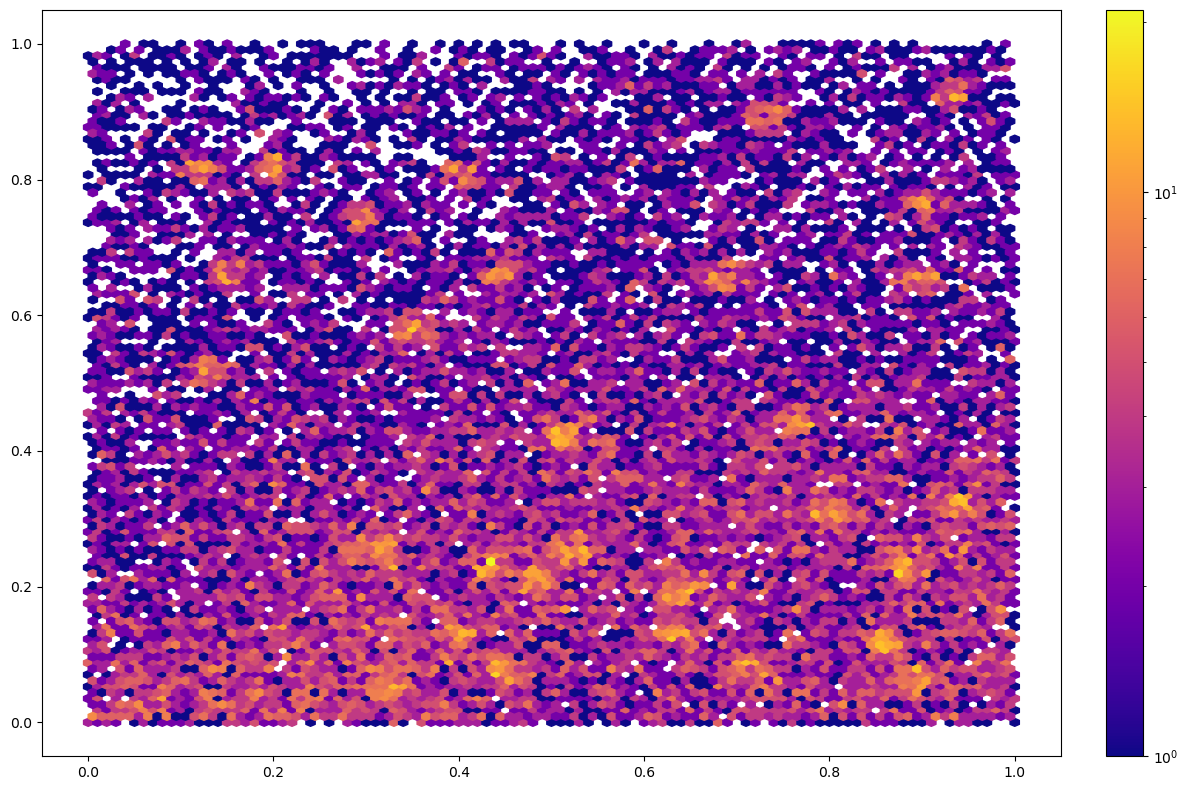

In [5]:
fig = plt.figure(1,figsize=(12,8))
ax = fig.add_subplot(111)

s = ax.hexbin(x_data_l,y_data_l,gridsize=100,cmap='plasma',mincnt=1,bins='log')

plt.colorbar(s,fraction=0.046, pad=0.04)

plt.tight_layout()

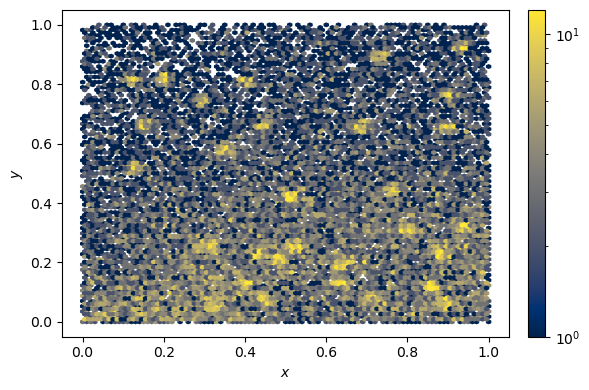

In [13]:
fig = plt.figure(1,figsize=(6,4))
ax = fig.add_subplot(111)

s = ax.hexbin(x_data_l,y_data_l,gridsize=100,cmap='cividis',mincnt=1,
             norm = mpl.colors.LogNorm(vmin = 1, vmax = 12))

plt.colorbar(s,fraction=0.046, pad=0.04)
plt.xlabel('$x$')
plt.ylabel('$y$')

plt.tight_layout()